# R-SQUARED

R-Squared adalah salah satu jenis pengukuran dalam mengevaluasi model regresi. R-Squared menjelaskan kualitas seberapa bagusnya independent variable kita terhadap dependent variable yang kita pilih. Pada bahasan kali ini akan dijelaskan perbedaan antara R-Squared dengan Adjusted R-Squared.

R-Squared mempunyai persamaan yang dapat dilihat sebagai berikut.

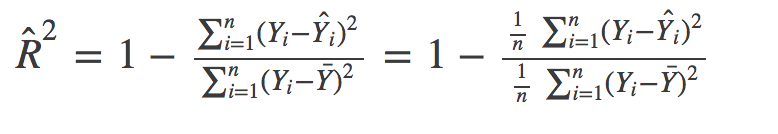

Yi = nilai target berdasarkan hasil observasi
y^ = nilai target berdasarkan hasil prediksi model

Dapat dilihat bahwa R-Squared ini nilainya didapat dari nilai MSE terhadap squared error dari y rata-rata. Maka, jika tingkat
MSE semakin kecil, maka nilai R-Squared ini semakin mendekati 1

Untuk apa adanya R-Squared? R-Squared ini akan menjadi bahan untuk analisis lebih lanjut, yaitu Adjusted R-Squared.

Adjusted R-Squared adalah upgrade dari R-Squared yang berfokus untuk model yang mempunyai fitur lebih dari 1. Kelebihan dari metric ini adalah memberikan skor penalty terhadap banyaknya fitur yang kita pakai. Semakin banyak fitur yang kita pakai, maka skor penalty semakin besar yang mengakibatkan nilai Adjusted R-Squared semakin kecil.

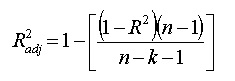

dengan n = total data, dan k = banyaknya fitur

Dapat dilihat dari rumus diatas bahwa jika nilai fitur atau k bertambah besar, maka nilai penyebut akan semakin besar. Hal ini mengakibatkan nilai adjusted R-Squared bisa menjadi lebih kecil daripada R-Squared

# CODING SECTION

Data yang diambil adalah data saat pembahasan BAB 1 Regresi Linear

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('salary.csv')

In [ ]:
#mengubah data menjadi array agar bisa dilakukan proses machine learning
X = df.pengalaman.values.reshape(-1,1) 
y = df.gaji.values
#Memisah data untuk proses data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/4, random_state = 42)

#import algoritma dari scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#memuat machine learning terhadap data latih
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

kemudian hasil prediksi dan hasil observasi kita ambil untuk analisis lebih jauh

In [6]:
df_reg = pd.DataFrame({'obs' : y_test, 'pred': y_pred, 'mean_obs': y_test.mean()})

In [7]:
df_reg.head(10)


,obs,pred,mean_obs
0,18.567,16.808600,29.851143
1,38.817,39.989957,29.851143
2,38.056,38.155461,29.851143
3,47.937,45.493445,29.851143
4,35.613,33.652608,29.851143
5,17.752,22.812404,29.851143
6,35.505,30.317160,29.851143
7,16.721,18.976640,29.851143
8,38.708,42.658315,29.851143
9,16.232,18.643095,29.851143


Perhitungan berdasarkan rumus R2


In [8]:
#aplikasi dari yi-y^
df_reg['error_sqrt'] = (df_reg['pred'] - df_reg['obs'])**2


#aplikasi dari yi-ymean
df_reg['error_mean'] = (df_reg['obs'] - df_reg['mean_obs'])**2
df_reg.head()

,obs,pred,mean_obs,error_sqrt,error_mean
0,18.567,16.808600,29.851143,3.091972,127.331880
1,38.817,39.989957,29.851143,1.375829,80.386594
2,38.056,38.155461,29.851143,0.009893,67.319681
3,47.937,45.493445,29.851143,5.970961,327.098229
4,35.613,33.652608,29.851143,3.843138,33.198998


In [10]:
1-(df_reg['error_sqrt'].mean() / df_reg['error_mean'].mean())

0.8895873631150273

crosscheck dengan hasil scikit-learn

In [33]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.8895873631150273

Implementasi Adjusted R Squared

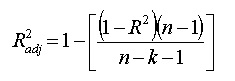

In [37]:
n = df_reg.count()[0]


def R_adj(k):
    return 1 - (((1-R2)*(n-1)/(n - k - 1)))
    

print('Saat k = 1, R_adj = {}'.format(R_adj(1)))


print('Saat k = 2, R_adj = {}'.format(R_adj(2)))


print('Saat k = 3, R_adj = {}'.format(R_adj(3)))

print('Saat k = 4, R_adj = {}'.format(R_adj(4)))


Saat k = 1, R_adj = 0.8875426846541945
Saat k = 2, R_adj = 0.8854208485155943
Saat k = 3, R_adj = 0.8832174032947404
Saat k = 4, R_adj = 0.8809275484573824


# KESIMPULAN

Adjusted R Squared bertujuan agar kita bisa mengetahui bobot dalam fitur yang baru kita masukkan, dengan cara memberikan skor penalty. Selain itu, kita dapat mempercepat proses modelling saat menuju ke tahap production. Kita tak akan bisa mengetahui adanya fitur yang tak berguna hanya dengan R Squared, karena R Squared bersifat bias. Nilai R Squared hanya bisa lebih besar, atau tidak berubah sama sekali.
